In [1]:
#imports
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "NWHL_Data.csv"
nwhl = pd.read_csv(path)

# Data Overview

In [3]:
nwhl.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [4]:
#Events
nwhl.Event.unique()

array(['Faceoff Win', 'Puck Recovery', 'Zone Entry', 'Shot', 'Play',
       'Takeaway', 'Dump In/Out', 'Incomplete Play', 'Penalty Taken',
       'Goal'], dtype=object)

In [5]:
nwhl.shape

(26882, 21)

# Creating a Powerplay Dataset
* Since the aim of the study is to help identify the top-5 Powerplay players, the dataset is filtered to only include events that take place during the powerplay [One team has more players than the opponent].

In [6]:
sp_play = nwhl[nwhl["Home Team Skaters"] != nwhl["Away Team Skaters"]] #special plays where both teams don't have equal players
sp_play.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
211,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:48,4,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,169,65,Forehand,NaN,NaN,NaN,Jonna Curtis,NaN,NaN
212,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:47,4,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,144,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:45,4,5,0,0,Boston Pride,McKenna Brand,Play,130,83,Direct,NaN,NaN,NaN,Lauren Kelly,131.0,59.0
214,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:43,4,5,0,0,Boston Pride,Lauren Kelly,Play,136,32,Direct,NaN,NaN,NaN,Taylor Turnquist,159.0,4.0
215,2021-01-23,Minnesota Whitecaps,Boston Pride,1,12:39,4,5,0,0,Boston Pride,Taylor Turnquist,Play,162,2,Direct,NaN,NaN,NaN,Lauren Kelly,129.0,49.0


In [7]:
powerplay_h = np.logical_and(sp_play['Home Team Skaters']>sp_play['Away Team Skaters'], sp_play['Team'] == sp_play['Home Team'])  
powerplay_h = sp_play[powerplay_h] #events where home team is in powerplay

powerplay_a = np.logical_and(sp_play['Home Team Skaters']<sp_play['Away Team Skaters'], sp_play['Team'] == sp_play['Away Team'])  
powerplay_a = sp_play[powerplay_a] #events where away team is in powerplay

powerplay = pd.concat([powerplay_h, powerplay_a], ignore_index = True)
powerplay.head()   #dataset made for powerplay

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,2:15,5,4,1,1,Minnesota Whitecaps,Meghan Lorence,Faceoff Win,169,20,Forehand,NaN,NaN,NaN,Carlee Turner,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,1:06,5,4,1,1,Minnesota Whitecaps,Maddie Rowe,Puck Recovery,87,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,1:06,5,4,1,1,Minnesota Whitecaps,Maddie Rowe,Play,79,79,Direct,NaN,NaN,NaN,Emma Stauber,81.0,48.0
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,1:02,5,4,1,1,Minnesota Whitecaps,Emma Stauber,Zone Entry,124,6,Carried,NaN,NaN,NaN,Kaleigh Fratkin,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,1:00,5,4,1,1,Minnesota Whitecaps,Emma Stauber,Play,153,1,Indirect,NaN,NaN,NaN,Allie Thunstrom,194.0,70.0


In [8]:
print(powerplay.shape)

(4390, 21)


In [9]:
powerplay.to_csv('powerplay_dataset.csv')

# Initial Powerplay Exploration

In [10]:
#Events
print(powerplay['Event'].unique())

['Faceoff Win' 'Puck Recovery' 'Play' 'Zone Entry' 'Dump In/Out'
 'Incomplete Play' 'Shot' 'Goal' 'Takeaway' 'Penalty Taken']


### I. Calculating Player Statistics:

In [11]:
#Calculating player statistics
powerplay["count"] = 1 #count variable which is used keep track of event counts

pp_events_per_player = powerplay.groupby(["Player","Event"])["count"].sum().reset_index()
pp_player_stats = pp_events_per_player.pivot(index = 'Player',columns = 'Event', values = 'count')
pp_player_stats.reset_index(level=0, inplace=True)
pp_player_stats.columns.name = None 

#replace NaN values with 0 -> if player hasn't scored goals the Goal column value is changed to 0 instead of Nan
pp_player_stats = pp_player_stats.fillna(0)
pp_player_stats.head()

,Player,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry
0,Abbie Ives,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,0.0,0.0
1,Allie Thunstrom,0.0,0.0,0.0,2.0,0.0,15.0,4.0,4.0,2.0,3.0
2,Alyson Matteau,2.0,0.0,0.0,7.0,0.0,19.0,15.0,11.0,0.0,7.0
3,Alyssa Wohlfeiler,0.0,0.0,0.0,2.0,0.0,31.0,5.0,2.0,0.0,3.0
4,Amanda Conway,0.0,0.0,0.0,1.0,0.0,6.0,2.0,0.0,0.0,1.0


### II. Calculating Team Statistics:

In [13]:
#Calculate team statistics (will help to calculate the player's contribution to team)
#Helps identify average players in great teams, and great players in average teams
pp_events_per_team = powerplay.groupby(["Team","Event"])["count"].sum().reset_index()
pp_team_stats = pp_events_per_team.pivot(index = 'Team',columns = 'Event', values = 'count')
pp_team_stats.reset_index(level = 0, inplace = True)
pp_team_stats.columns.name = None
pp_team_stats

,Team,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry
0,Boston Pride,17,54,8,113,2,682,358,147,12,77
1,Buffalo Beauts,13,17,2,76,1,277,177,44,9,50
2,Connecticut Whale,8,11,1,31,1,177,101,42,2,25
3,Metropolitan Riveters,3,12,1,35,1,199,88,41,6,22
4,Minnesota Whitecaps,5,14,5,42,1,242,120,47,4,30
5,Toronto Six,11,33,5,67,3,450,208,96,9,55


In [14]:
# Merge player and team stats

#create a dataframe of all players and their team
pp_players_list = powerplay.drop_duplicates('Player')
pp_players_list = pp_players_list[['Player','Team']]

#add the team name to individual player statistics dataframe
pp_player_stats_m = pd.merge(pp_player_stats, pp_players_list, how = 'left', on = 'Player')

#merge the individual & team statistics dataframe using the team name
pp_merged_stats = pd.merge(pp_player_stats_m, pp_team_stats, on = 'Team', how = 'left', suffixes = ['_player', '_team'])
pp_merged_stats.head()

,Player,Dump In/Out_player,Faceoff Win_player,Goal_player,Incomplete Play_player,Penalty Taken_player,Play_player,Puck Recovery_player,Shot_player,Takeaway_player,Zone Entry_player,Team,Dump In/Out_team,Faceoff Win_team,Goal_team,Incomplete Play_team,Penalty Taken_team,Play_team,Puck Recovery_team,Shot_team,Takeaway_team,Zone Entry_team
0,Abbie Ives,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,0.0,0.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25
1,Allie Thunstrom,0.0,0.0,0.0,2.0,0.0,15.0,4.0,4.0,2.0,3.0,Minnesota Whitecaps,5,14,5,42,1,242,120,47,4,30
2,Alyson Matteau,2.0,0.0,0.0,7.0,0.0,19.0,15.0,11.0,0.0,7.0,Buffalo Beauts,13,17,2,76,1,277,177,44,9,50
3,Alyssa Wohlfeiler,0.0,0.0,0.0,2.0,0.0,31.0,5.0,2.0,0.0,3.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25
4,Amanda Conway,0.0,0.0,0.0,1.0,0.0,6.0,2.0,0.0,0.0,1.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25


### III. Calculating Base Metrics that will be used to determine best 5 Powerplay players

In [15]:
#Calculate the metrics we will be using to determine powerplay players

#Power play important metrics: successful shots and precise passes
pp_merged_stats["shot_accuracy"] = (pp_merged_stats["Goal_player"]/(pp_merged_stats["Goal_player"]+pp_merged_stats["Shot_player"]))*100
pp_merged_stats["pass_accuracy"] = (pp_merged_stats["Play_player"]/(pp_merged_stats["Play_player"]+pp_merged_stats["Incomplete Play_player"]))*100

#how important / influential is a player to their team
pp_merged_stats["Player_Goal_Contribution"]  = (pp_merged_stats["Goal_player"]/pp_merged_stats["Goal_team"])*100 
pp_merged_stats["Player_Pass_Contribution"]  = (pp_merged_stats["Play_player"]/pp_merged_stats["Play_team"])*100
pp_merged_stats["Player_Zone_Entry_Contribution"]  = (pp_merged_stats["Zone Entry_player"]/pp_merged_stats["Zone Entry_team"])*100

In [16]:
pp_merged_stats.head()

,Player,Dump In/Out_player,Faceoff Win_player,Goal_player,Incomplete Play_player,Penalty Taken_player,Play_player,Puck Recovery_player,Shot_player,Takeaway_player,Zone Entry_player,Team,Dump In/Out_team,Faceoff Win_team,Goal_team,Incomplete Play_team,Penalty Taken_team,Play_team,Puck Recovery_team,Shot_team,Takeaway_team,Zone Entry_team,shot_accuracy,pass_accuracy,Player_Goal_Contribution,Player_Pass_Contribution,Player_Zone_Entry_Contribution
0,Abbie Ives,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,0.0,0.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25,NaN,80.000000,0.0,2.259887,0.0
1,Allie Thunstrom,0.0,0.0,0.0,2.0,0.0,15.0,4.0,4.0,2.0,3.0,Minnesota Whitecaps,5,14,5,42,1,242,120,47,4,30,0.0,88.235294,0.0,6.198347,10.0
2,Alyson Matteau,2.0,0.0,0.0,7.0,0.0,19.0,15.0,11.0,0.0,7.0,Buffalo Beauts,13,17,2,76,1,277,177,44,9,50,0.0,73.076923,0.0,6.859206,14.0
3,Alyssa Wohlfeiler,0.0,0.0,0.0,2.0,0.0,31.0,5.0,2.0,0.0,3.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25,0.0,93.939394,0.0,17.514124,12.0
4,Amanda Conway,0.0,0.0,0.0,1.0,0.0,6.0,2.0,0.0,0.0,1.0,Connecticut Whale,8,11,1,31,1,177,101,42,2,25,NaN,85.714286,0.0,3.389831,4.0


In [17]:
#calculate assists

#get the event from the next row
powerplay['lead_play'] = powerplay['Event'].shift(-1)
powerplay.drop(powerplay.tail(1).index,inplace=True) # drop last row

#assist is when current event = Pass and next_event = Goal
assists_tf = np.logical_and(powerplay['Event']=='Play', powerplay['lead_play'] == 'Goal')
assists_df = powerplay.loc[assists_tf]
assists = assists_df.groupby('Player')['Player'].count()
assists

Player
Alyson Matteau         1
Alyssa Wohlfeiler      1
Christina Putigna      1
Emma Stauber           1
Haley Mack             1
Jillian Dempsey        2
Lexie Laing            1
Lindsay Eastwood       1
McKenna Brand          1
Meghan Lorence         1
Mikyla Grant-Mentis    1
Nina Rodgers           1
Shiann Darkangelo      2
Taylor Turnquist       1
Name: Player, dtype: int64

In [18]:
assists_dict = {
'Alyson Matteau': 1,
'Alyssa Wohlfeiler': 1,
'Christina Putigna': 1,
'Emma Stauber': 1,
'Haley Mack': 1,
'Jillian Dempsey': 2,
'Lexie Laing': 1,
'Lindsay Eastwood': 1,
'McKenna Brand': 1,
'Meghan Lorence': 1,
'Mikyla Grant-Mentis': 1,
'Nina Rodgers': 1,
'Shiann Darkangelo': 2,
'Taylor Turnquist': 1}

In [19]:
pp_merged_stats['Assists'] = pp_merged_stats['Player'].map(assists_dict)

In [20]:
pp_final_df = pp_merged_stats[['Player','Goal_player','Play_player','Incomplete Play_player','Shot_player','Zone Entry_player','Team','shot_accuracy','pass_accuracy','Player_Goal_Contribution','Player_Pass_Contribution','Player_Zone_Entry_Contribution', 'Assists']]
pp_final_df.head()

,Player,Goal_player,Play_player,Incomplete Play_player,Shot_player,Zone Entry_player,Team,shot_accuracy,pass_accuracy,Player_Goal_Contribution,Player_Pass_Contribution,Player_Zone_Entry_Contribution,Assists
0,Abbie Ives,0.0,4.0,1.0,0.0,0.0,Connecticut Whale,NaN,80.000000,0.0,2.259887,0.0,NaN
1,Allie Thunstrom,0.0,15.0,2.0,4.0,3.0,Minnesota Whitecaps,0.0,88.235294,0.0,6.198347,10.0,NaN
2,Alyson Matteau,0.0,19.0,7.0,11.0,7.0,Buffalo Beauts,0.0,73.076923,0.0,6.859206,14.0,1.0
3,Alyssa Wohlfeiler,0.0,31.0,2.0,2.0,3.0,Connecticut Whale,0.0,93.939394,0.0,17.514124,12.0,1.0
4,Amanda Conway,0.0,6.0,1.0,0.0,1.0,Connecticut Whale,NaN,85.714286,0.0,3.389831,4.0,NaN


In [21]:
pp_final_df.shape

(102, 13)

In [22]:
pp_final_df = pp_final_df.fillna(0)  #replace Nan's with 0.

### IV. Segregating players based on their shooting patterns:

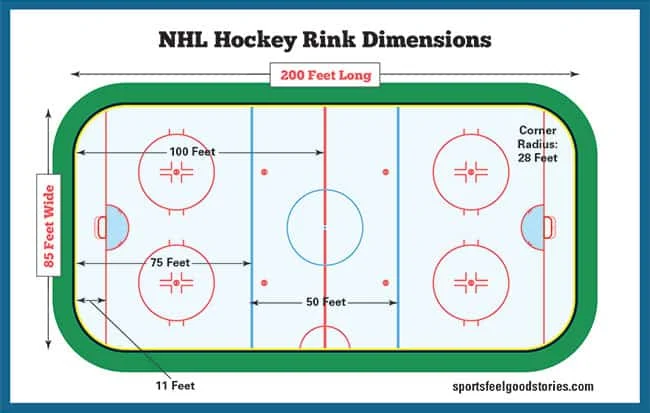


* Field is from 0 to 200ft:
    * Goal is at 200 - 11 = 189
    * Blue line (attacking zone start) = 125. Mid way between attacking zone and goal = 157
    * The 157ft mark is used to segregate shots between short and long

In [23]:
shot_dist_df = powerplay[powerplay["Event"] == "Shot"]
shot_dist_df = shot_dist_df.groupby("Player")["X Coordinate"].mean().reset_index()
shot_dist_df["shooter_type"] = np.where(shot_dist_df["X Coordinate"] > 157, "Long","Short")
shot_dist_df.head()

,Player,X Coordinate,shooter_type
0,Allie Thunstrom,181.250000,Long
1,Alyson Matteau,144.909091,Short
2,Alyssa Wohlfeiler,174.500000,Long
3,Amy Curlew,174.750000,Long
4,Autumn MacDougall,169.000000,Long


In [24]:
#create a dictionary (Player: Shooter_type) and then map this to the dataframe
shot_dict = pd.Series(shot_dist_df.shooter_type.values,index=shot_dist_df.Player).to_dict()
pp_final_df['shooter_type'] = pp_final_df['Player'].map(shot_dict)
pp_final_df.head()

,Player,Goal_player,Play_player,Incomplete Play_player,Shot_player,Zone Entry_player,Team,shot_accuracy,pass_accuracy,Player_Goal_Contribution,Player_Pass_Contribution,Player_Zone_Entry_Contribution,Assists,shooter_type
0,Abbie Ives,0.0,4.0,1.0,0.0,0.0,Connecticut Whale,0.0,80.000000,0.0,2.259887,0.0,0.0,NaN
1,Allie Thunstrom,0.0,15.0,2.0,4.0,3.0,Minnesota Whitecaps,0.0,88.235294,0.0,6.198347,10.0,0.0,Long
2,Alyson Matteau,0.0,19.0,7.0,11.0,7.0,Buffalo Beauts,0.0,73.076923,0.0,6.859206,14.0,1.0,Short
3,Alyssa Wohlfeiler,0.0,31.0,2.0,2.0,3.0,Connecticut Whale,0.0,93.939394,0.0,17.514124,12.0,1.0,Long
4,Amanda Conway,0.0,6.0,1.0,0.0,1.0,Connecticut Whale,0.0,85.714286,0.0,3.389831,4.0,0.0,NaN


In [25]:
print(pp_final_df.shape)

(102, 14)


# Creating Base Dataset

In [26]:
pp_final_df.to_csv('base_dataset.csv')